
<a id='solow'></a>

# The Solow-Swan Growth Model

In this lecture we review a famous model due
to [Robert Solow (1925–2023)](https://en.wikipedia.org/wiki/Robert_Solow) and [Trevor Swan (1918–1989)](https://en.wikipedia.org/wiki/Trevor_Swan).

The model is used to study growth over the long run.

Although the model is simple, it contains some interesting lessons.

We will use the following imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## The model

In a Solow–Swan economy, agents save a fixed fraction of their current
incomes.

Savings sustain or increase the stock of capital.

Capital is combined with labor to produce output, which in turn is paid out to
workers and owners of capital.

To keep things simple, we ignore population and productivity growth.

For each integer $ t \geq 0 $, output $ Y_t $ in period $ t $ is given by $ Y_t =
F(K_t, L_t) $, where $ K_t $ is capital, $ L_t $ is labor and $ F $ is an aggregate
production function.

The function $ F $ is assumed to be nonnegative and
**homogeneous of degree one**, meaning
that

$$
F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{for all } \lambda \geq 0
$$

Production functions with this property include

- the **Cobb-Douglas** function $ F(K, L) = A K^{\alpha}
  L^{1-\alpha} $ with $ 0 \leq \alpha \leq 1 $ and  
- the **CES** function $ F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho} $
  with $ a, b, \rho > 0 $.  


We assume a closed economy, so aggregate domestic investment equals aggregate domestic
saving.

The saving rate is a constant $ s $ satisfying $ 0 \leq s \leq 1 $, so that aggregate
investment and saving both equal  $ s Y_t $.

Capital depreciates: without replenishing through investment, one unit of capital today
becomes $ 1-\delta $ units tomorrow.

Thus,

$$
K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
$$

Without population growth, $ L_t $ equals some constant $ L $.

Setting $ k_t := K_t / L $ and using homogeneity of degree one now yields

$$
k_{t+1}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) k_t
    = s F(k_t, 1) + (1 - \delta) k_t
$$

With  $ f(k) := F(k, 1) $, the final expression for capital dynamics is


<a id='equation-solow'></a>
$$
k_{t+1} = g(k_t)
    \text{ where } g(k) := s f(k) + (1 - \delta) k \tag{21.1}
$$

Our aim is to learn about the evolution of $ k_t $ over time,
given an exogenous initial capital stock  $ k_0 $.

## A graphical perspective

To understand the dynamics of the sequence $ (k_t)_{t \geq 0} $ we use a 45
degree diagram.

To do so, we first
need to specify the functional form for $ f $ and assign values to the parameters.

We choose the Cobb–Douglas specification $ f(k) = A k^\alpha $ and set $ A=2.0 $,
$ \alpha=0.3 $, $ s=0.3 $ and $ \delta=0.4 $.

The function $ g $ from [(21.1)](#equation-solow) is then plotted, along with the 45
degree line.

Let’s define the constants.

In [2]:
A, s, alpha, delta = 2, 0.3*1.3, 0.3, 0.4
x0 = 0.25
xmin, xmax = 0, 3

Now, we define the function $ g $.

In [3]:
def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k

Let’s plot the 45 degree diagram of $ g $.

In [4]:
def plot45(kstar=None):
    xgrid = np.linspace(xmin, xmax, 12000)

    fig, ax = plt.subplots()

    ax.set_xlim(xmin, xmax)

    g_values = g(A, s, alpha, delta, xgrid)

    ymin, ymax = np.min(g_values), np.max(g_values)
    ax.set_ylim(ymin, ymax)

    lb = r'$g(k) = sAk^{\alpha} + (1 - \delta)k$'
    ax.plot(xgrid, g_values,  lw=2, alpha=0.6, label=lb)
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    if kstar:
        fps = (kstar,)

        ax.plot(fps, fps, 'go', ms=10, alpha=0.6)

        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, kstar),
                 xycoords='data',
                 xytext=(-40, -60),
                 textcoords='offset points',
                 fontsize=14,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='upper left', frameon=False, fontsize=12)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((0, 1, 2, 3))

    ax.set_xlabel('$k_t$', fontsize=12)
    ax.set_ylabel('$k_{t+1}$', fontsize=12)

    plt.show()

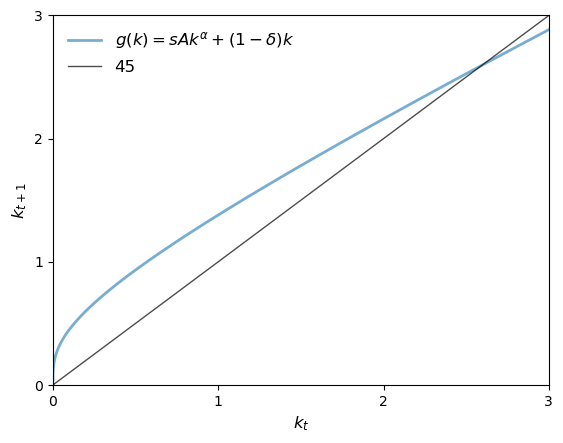

In [5]:
plot45()

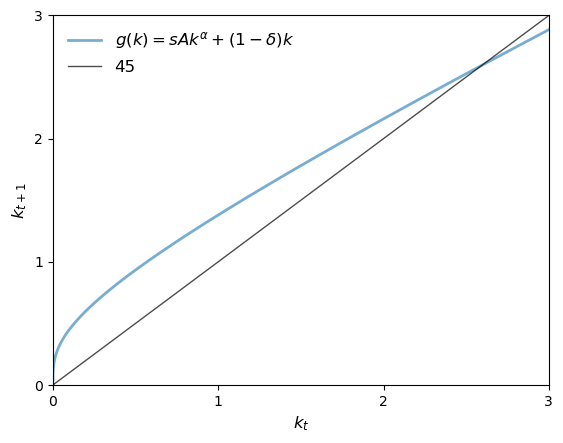

In [6]:
plot45()

Suppose, at some $ k_t $, the value $ g(k_t) $ lies strictly above the 45 degree line.

Then we have $ k_{t+1} = g(k_t) > k_t $ and capital per worker rises.

If $ g(k_t) < k_t $ then capital per worker falls.

If $ g(k_t) = k_t $, then we are at a **steady state** and $ k_t $ remains constant.

(A steady state of the model is a [fixed point](https://en.wikipedia.org/wiki/Fixed_point_%28mathematics%29) of the mapping $ g $.)

From the shape of the function $ g $ in the figure, we see that
there is a unique steady state in $ (0, \infty) $.

It solves $ k = s Ak^{\alpha} + (1-\delta)k $ and hence is given by


<a id='equation-kstarss'></a>
$$
k^* := \left( \frac{s A}{\delta} \right)^{1/(1 - \alpha)} \tag{21.2}
$$

If initial capital is below $ k^* $, then capital increases over time.

If initial capital is above this level, then the reverse is true.

Let’s plot the 45 degree diagram to show the $ k^* $ in the plot.

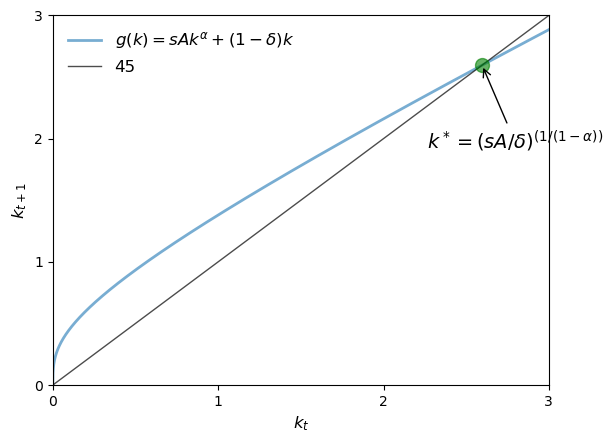

In [7]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot45(kstar)

From our graphical analysis, it appears that $ (k_t) $ converges to $ k^* $, regardless of initial capital
$ k_0 $.

This is a form of global stability.

The next figure shows three time paths for capital, from
three distinct initial conditions, under the parameterization listed above.

At this parameterization, $ k^* \approx 1.78 $.

Let’s define the constants and three distinct initial conditions

In [8]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = np.array([.25, 1.25, 3.25])

ts_length = 20
xmin, xmax = 0, ts_length
ymin, ymax = 0, 3.5

In [9]:
def simulate_ts(x0_values, ts_length):

    k_star = (s * A / delta)**(1/(1-alpha))
    fig, ax = plt.subplots(figsize=[11, 5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x0_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = g(A, s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %x_init)
    ax.plot(np.arange(ts_length), np.full(ts_length,k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

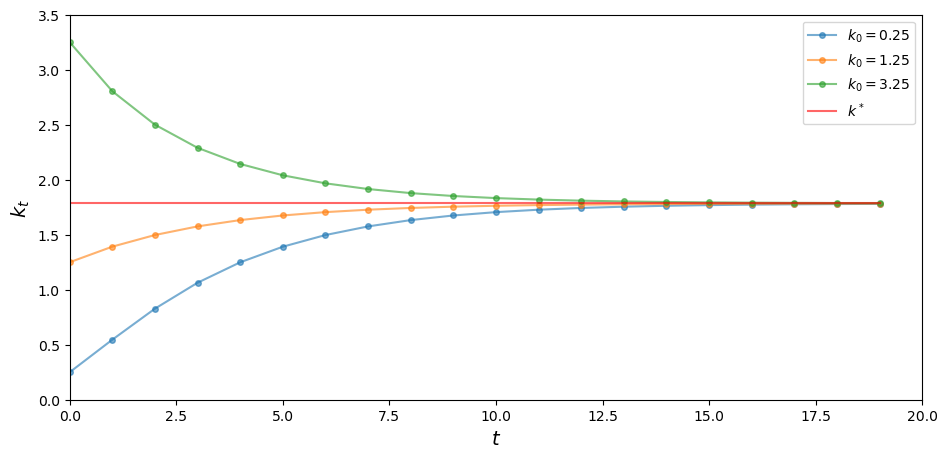

In [10]:
simulate_ts(x0, ts_length)

As expected, the time paths in the figure all converge to $ k^* $.

## Exercises

#### 1. Depreciation: modify depreciation rate to $\delta=0.5$, $\delta=0$ and $\delta=1$. Explain intuition

#### 2. Initial capital: if, from the ss $k_o$, the stock of capital is destroyed so as to reduce 50\% of its value, what happends? what if capital is increased by 50\%?

#### 3. What happends if L decline by 50\%?
#### 4. What happends if L is growing over time? (See ABC of RBC)